In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36851 entries, 0 to 36850
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            36851 non-null  object 
 1   Summary                   36851 non-null  object 
 2   Precip Type               36851 non-null  object 
 3   Temperature (C)           36851 non-null  float64
 4   Apparent Temperature (C)  36851 non-null  float64
 5   Humidity                  36851 non-null  float64
 6   Wind Speed (km/h)         36851 non-null  float64
 7   Wind Bearing (degrees)    36851 non-null  int64  
 8   Visibility (km)           36851 non-null  float64
 9   Loud Cover                36850 non-null  float64
 10  Pressure (millibars)      36850 non-null  float64
 11  Daily Summary             36850 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.4+ MB


In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,36851.000000,36851.000000,36851.000000,36851.000000,36851.000000,36851.000000,36850.0,36850.000000
mean,12.032793,10.936169,0.718249,10.929500,189.672872,10.107664,0.0,1001.464174
std,9.522805,10.655460,0.193630,7.027677,107.104344,3.756027,0.0,125.218813
min,-16.666667,-24.233333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.000000,2.566667,0.590000,5.892600,118.000000,9.756600,0.0,1011.910000
50%,12.105556,12.105556,0.770000,9.982000,187.000000,9.982000,0.0,1016.680000
75%,18.888889,18.888889,0.880000,14.312900,290.000000,11.270000,0.0,1021.420000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  1
Pressure (millibars)        1
Daily Summary               1
dtype: int64

In [9]:
# Filling missing values in 'Precip Type' with the mode of the column
mode_precip_type = df['Precip Type'].mode()[0]
df['Precip Type'].fillna(mode_precip_type, inplace=True)


In [10]:
# Verifying that there are no missing values left in the 'Precip Type' column
print(df['Precip Type'].isnull().sum())

0


In [11]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# List of continuous variables to be normalized
continuous_vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']

# Method 1: Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[continuous_vars] = min_max_scaler.fit_transform(df_min_max_scaled[continuous_vars])

# Display the first few rows of the dataframe to verify Min-Max scaling
print("Min-Max Scaled Data:")
print(df_min_max_scaled.head())




Min-Max Scaled Data:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         0.462045   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         0.459982   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         0.460375   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         0.441127   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         0.449376   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  0.505058      0.89           0.221130   
1                  0.502484      0.86           0.223399   
2                  0.536823      0.89           0.061523   
3                  0.481988      0.83           0.220877   
4                  0.498492      0.83           0.172970   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251            0.983         0.0   

In [12]:
print(df.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Separating target column from input features
X = df.drop(columns=['Precip Type'])  # Input features
y = df['Precip Type']  # Target column

# Converting categorical variables to numerical using label encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Applying label encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of training and testing sets:
X_train: (29480, 11)
X_test: (7371, 11)
y_train: (29480,)
y_test: (7371,)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Separating target column from input features
X = df.drop(columns=['Precip Type'])  # Input features
y = df['Precip Type']  # Target column

# converting categorical variables to numerical using label encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Applying label encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# encoding the target column
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Handling missing values by filling them with the most frequent value in each column
X = X.apply(lambda col: col.fillna(col.mode()[0]))

# Normalizing the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and print results
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)
    return accuracy, report

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_acc, log_reg_report = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
print("Logistic Regression Model Accuracy:", log_reg_acc)
print("\nClassification Report:\n", log_reg_report)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
dt_acc, dt_report = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
print("Decision Tree Model Accuracy:", dt_acc)
print("\nClassification Report:\n", dt_report)

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
rf_acc, rf_report = evaluate_model(random_forest, X_train, X_test, y_train, y_test)
print("Random Forest Model Accuracy:", rf_acc)
print("\nClassification Report:\n", rf_report)

# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gb_acc, gb_report = evaluate_model(gradient_boosting, X_train, X_test, y_train, y_test)
print("Gradient Boosting Model Accuracy:", gb_acc)
print("\nClassification Report:\n", gb_report)

# Neural Network Classifier (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_acc, mlp_report = evaluate_model(mlp, X_train, X_test, y_train, y_test)
print("Neural Network Model Accuracy:", mlp_acc)
print("\nClassification Report:\n", mlp_report)


Logistic Regression Model Accuracy: 0.9930809930809931

Classification Report:
               precision    recall  f1-score   support

        rain       1.00      1.00      1.00      6563
        snow       0.97      0.97      0.97       808

    accuracy                           0.99      7371
   macro avg       0.98      0.98      0.98      7371
weighted avg       0.99      0.99      0.99      7371

Decision Tree Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        rain       1.00      1.00      1.00      6563
        snow       1.00      1.00      1.00       808

    accuracy                           1.00      7371
   macro avg       1.00      1.00      1.00      7371
weighted avg       1.00      1.00      1.00      7371

Random Forest Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        rain       1.00      1.00      1.00      6563
        snow       1.00      1.00      

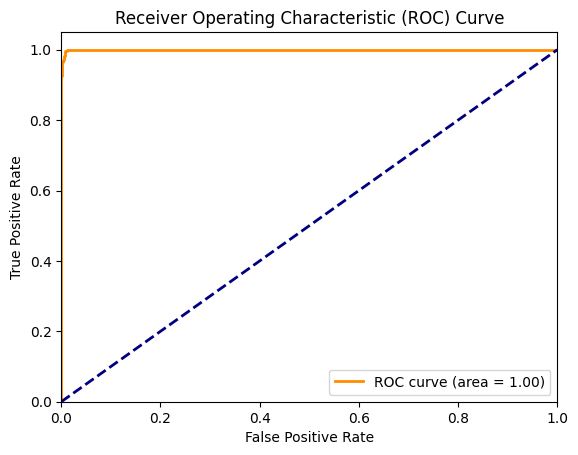

AUC for Logistic Regression: 0.9997037472298198


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Fit the logistic regression model
log_reg.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC for Logistic Regression:", roc_auc)


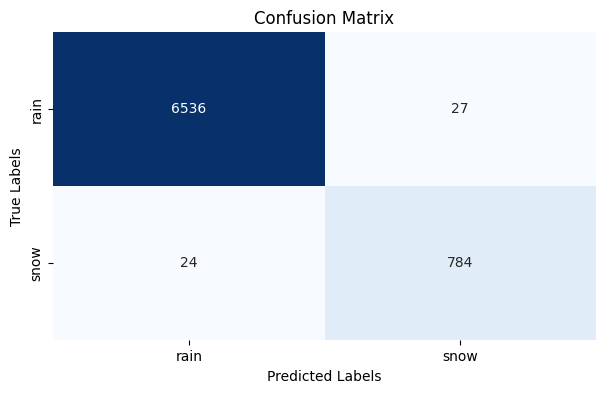

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = log_reg.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


Accuracy: 0.9924317039033747
Precision: 0.9506172839506173
Recall: 0.9844748858447488
F1-score: 0.9672498878420815
ROC-AUC: 0.9997626243652071

Classification Report:
              precision    recall  f1-score   support

        rain       1.00      0.99      1.00     17101
        snow       0.95      0.98      0.97      2190

    accuracy                           0.99     19291
   macro avg       0.97      0.99      0.98     19291
weighted avg       0.99      0.99      0.99     19291



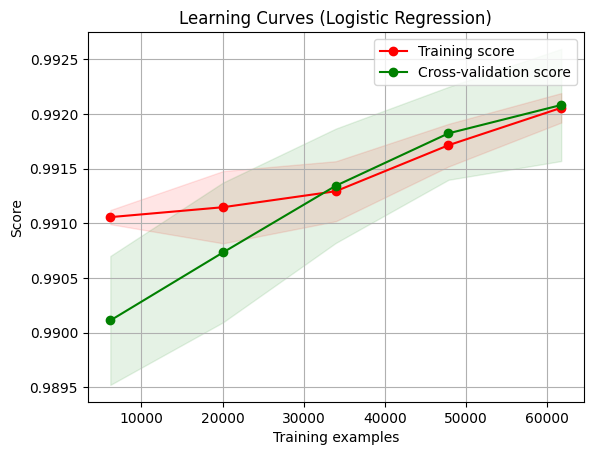

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usage Example
title = "Learning Curves (Logistic Regression)"
estimator = LogisticRegression(max_iter=1000)
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()
